In [1]:
#Data.csv

**Step 1: Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Step 2: Importing dataset**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/preprocessingData.csv')

**Step 3: Handling the missing data**

In [4]:
data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

mean_imputer=SimpleImputer(strategy='mean')
data[['Age','Salary']]=mean_imputer.fit_transform(data[['Age','Salary']])
data.Age = data.Age.astype('int')

**Step 4: Encoding categorical data**

In [6]:
data.Purchased = data.Purchased.map({'No':0, 'Yes':1})

**EDA**

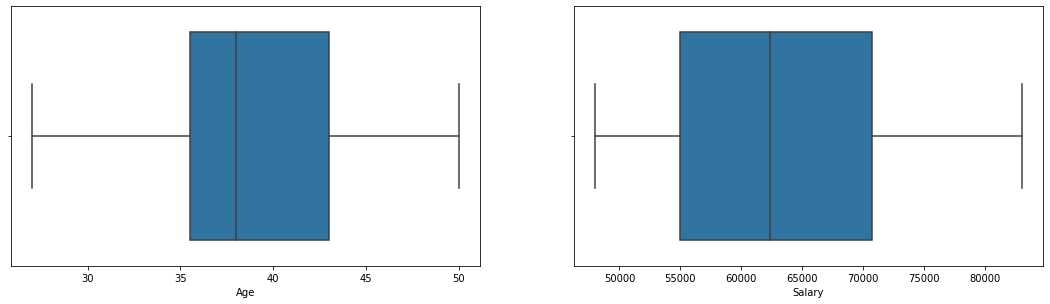

In [7]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(2,2,1)
sns.boxplot(x=data.Age)
plt.show;
plt.subplot(2,2,2)
sns.boxplot(x=data.Salary)
plt.show;

**Step 5: Creating a dummy variable**

In [8]:
ohe = pd.get_dummies(data['Country'],prefix='ohe_')

In [9]:
data[['ohe__France','ohe__Germany','ohe__Spain']] = ohe[['ohe__France','ohe__Germany','ohe__Spain']]

In [10]:
data.columns

Index(['Country', 'Age', 'Salary', 'Purchased', 'ohe__France', 'ohe__Germany',
       'ohe__Spain'],
      dtype='object')

**Step 6: Splitting the datasets into training sets and Test sets**

In [11]:
X = data[['Age', 'Salary', 'ohe__France', \
          'ohe__Germany','ohe__Spain']].values
y  = data.Purchased.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=2)

**Step 7: Feature Scaling**

In [12]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
scaled_Xtr = scaler.fit_transform(X_train)
scaled_Xts = scaler.transform(X_test)